In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.random.set_seed(101)

x = tf.linspace(0., 50., 50) 
y = tf.linspace(0., 50., 50) 

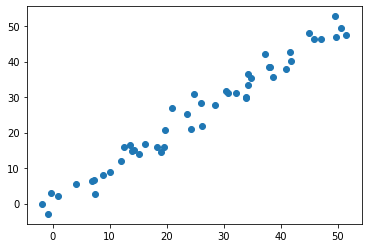

In [3]:
x = x + tf.random.uniform([50],-4,4)
y = y + tf.random.uniform([50],-4,4)

plt.scatter(x.numpy(),y.numpy())

In [4]:
W = tf.Variable(np.random.randn(),name = 'W')
B = tf.Variable(np.random.randn(), name = "B")

In [5]:
epochs = []
loss = []

# Find the derivative of loss with respect to weight and bias
def grad(x, y, weights, biases):
    
  with tf.GradientTape() as tape:
    # loss_ = loss(x, y, weights, biases)
    prediction = weights * x + biases
    
    error = prediction - y
    
    squaredError = tf.square(error)
    
    loss_ = tf.reduce_mean(input_tensor=squaredError)
    
  return tape.gradient(loss_, [weights, biases]) # direction and value of the gradient of our loss w.r.t weight and bias

print("W=",W.numpy())
print("B=",B.numpy())


W= 0.12096244
B= -0.0078032953


In [8]:
for i in range(400):
    if i%50 ==0:
        print("Iteration={}".format(i))
        print("W={0},B={1}".format(W.numpy(),B.numpy()))
    
    deltaW, deltaB = grad(x, y, W, B) #
    
    change_W = deltaW * 0.001 
    change_B = deltaB * 0.001
    
    # print("change_W:{0}, change_B:{1}".format(change_W,change_B))
    W.assign_sub(change_W)
    B.assign_sub(change_B)
    
    # find Loss for New Weight and Bias values
    prediction = W * x + B
    error = prediction - y
    squared_error = tf.square(error)
    loss_ = tf.reduce_mean(input_tensor=squared_error)
    epochs.append(i)
    loss.append(loss_)
    if i%50 ==0:
        print("deltaW={0},deltaB={1}".format(deltaW,deltaB))
        print("Step:{0} and Loss:{1}".format(i,loss_))
        print("\n")
    
print(len(loss))

Iteration=0
W=0.9889140725135803,B=0.1297624707221985
deltaW=0.003104686737060547,deltaB=-0.11297978460788727
Step:0 and Loss:7.039831161499023


Iteration=50
W=0.9887519478797913,B=0.13533954322338104
deltaW=0.0030384063720703125,deltaB=-0.11006510257720947
Step:50 and Loss:7.039208889007568


Iteration=100
W=0.9885939955711365,B=0.1407727599143982
deltaW=0.0030241012573242188,deltaB=-0.10722462832927704
Step:100 and Loss:7.038621425628662


Iteration=150
W=0.988440215587616,B=0.14606577157974243
deltaW=0.0030541419982910156,deltaB=-0.10445493459701538
Step:150 and Loss:7.038060188293457


Iteration=200
W=0.9882903099060059,B=0.15122225880622864
deltaW=0.00299835205078125,deltaB=-0.10176026821136475
Step:200 and Loss:7.0375285148620605


Iteration=250
W=0.9881442189216614,B=0.15624567866325378
deltaW=0.0028662681579589844,deltaB=-0.09913714230060577
Step:250 and Loss:7.037023544311523


Iteration=300
W=0.9880020022392273,B=0.16113954782485962
deltaW=0.002892017364501953,deltaB=-0.0965

In [9]:
loss[:10]

[<tf.Tensor: shape=(), dtype=float32, numpy=381.15314>,
 <tf.Tensor: shape=(), dtype=float32, numpy=217.58012>,
 <tf.Tensor: shape=(), dtype=float32, numpy=125.52896>,
 <tf.Tensor: shape=(), dtype=float32, numpy=73.72682>,
 <tf.Tensor: shape=(), dtype=float32, numpy=44.575024>,
 <tf.Tensor: shape=(), dtype=float32, numpy=28.169771>,
 <tf.Tensor: shape=(), dtype=float32, numpy=18.937662>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.742249>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.818502>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.173134>]

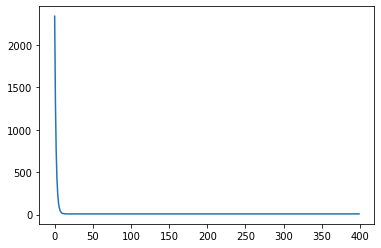

In [28]:
plt.plot(epochs,loss)